In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd 
from pandas import DataFrame
import math
import numpy as np
from numpy import genfromtxt
import sklearn
import sys
import matplotlib
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from nltk.corpus import stopwords
from sklearn import linear_model
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

## Training data
The data is read from the CSV files and labels of the authors are stored.

In [0]:
data=pd.read_csv('/content/drive/My Drive/Assignment-2_Dataset/Datasets/Question-5/Train(1).csv')
y=data['author']
y=y.to_numpy()


## Applying TfidVectorizer on the traning data and predicting the output, we get an accuracy of 82.12% 

In [5]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['text'])
X=vectors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
clf_c1 = LinearSVC(C=1.0)
clf_c1.fit(X_train, y_train)
y_pred_c1=clf_c1.predict(X_test)
accuracy_c1 = accuracy_score(y_test, y_pred_c1)
print("Accuracy: ",accuracy_c1*100)

Accuracy:  82.12575805936801


## Pre Processing data
There are many words in the english language which occur multiple times in all sentences and hence does not significantly help distinguish them. Thus, we run our model by removing all such words which are commonly referred to as "stop words".

In [ ]:
vectorizer = TfidfVectorizer(stop_words="english")
vectors = vectorizer.fit_transform(data['text'])
feature_names = vectorizer.get_feature_names()
print(feature_names)
print(vectors.shape)
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
X=df.to_numpy()

### The dense matrix is not always needed and thus we take the sparse matrix itself in this case.

In [0]:
vectorizer = TfidfVectorizer(stop_words="english")
vectors = vectorizer.fit_transform(data['text'])
X=vectors

## Splitting the training dataset into train and test sets.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


# Results

## Testing the accuracy of our model by tweaking the different kernels of SVM Classifier.

## SVM Classifier with 'linear' kernel

In [0]:
#SVClassifier
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

In [0]:
#SVC
y_pred = svclassifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy*100)

Accuracy:  79.57229492499202


## SVM Classifier with 'rbf' kernel

In [0]:
svclassifier_kr = SVC(kernel='rbf')
svclassifier_kr.fit(X_train, y_train)

In [0]:
y_pred_kr = svclassifier_kr.predict(X_test)
accuracy_kr = accuracy_score(y_test, y_pred_kr)
print("Accuracy: ",accuracy_kr*100)

Accuracy:  76.28471113948292


## SVM Classifier with 'poly' kernel

In [0]:
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, y_train)

In [0]:
y_pred = svclassifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy*100)

Accuracy:  43.21736354931376


## Thus we see that we get the best accuracy results for SVM classifier with linear kernel.

# Linear SVC

## Testing accuracy, F1 score and confusion matrix for different values of C

### C=1.0

In [0]:
clf_c1 = LinearSVC(C=1.0)
clf_c1.fit(X_train, y_train)

In [0]:
#LinearSVC
y_pred_c1=clf_c1.predict(X_test)
accuracy_c1 = accuracy_score(y_test, y_pred_c1)
print("Accuracy: ",accuracy_c1*100)

Accuracy:  80.81710820300032


In [0]:
f1 = f1_score(y_test, y_pred_c1,  average='macro')
print("F1 score: ",f1)

F1 score:  0.8063650255770661


In [0]:
print(confusion_matrix(y_test, y_pred_c1))

[[1090   90  109]
 [ 130  701   62]
 [ 149   61  741]]


### C=2.0

In [0]:
clf_c2 = LinearSVC(C=2.0)
clf_c2.fit(X_train, y_train)

In [0]:
y_pred_c2=clf_c2.predict(X_test)
accuracy_c2 = accuracy_score(y_test, y_pred_c2)
print("Accuracy: ",accuracy_c2*100)

Accuracy:  79.82764123842962


In [0]:
f1 = f1_score(y_test, y_pred_c2,  average='macro')
print("F1 score: ",f1)

F1 score:  0.7968813117217328


In [0]:
print(confusion_matrix(y_test, y_pred_c2))

[[1070   94  125]
 [ 140  692   61]
 [ 150   62  739]]


### C=4.0

In [0]:
clf_c4 = LinearSVC(C=4.0)
clf_c4.fit(X_train, y_train)

In [0]:
y_pred_c4=clf_c4.predict(X_test)
accuracy_c4 = accuracy_score(y_test, y_pred_c4)
print("Accuracy: ",accuracy_c4*100)

Accuracy:  79.22119374401532


In [0]:
f1 = f1_score(y_test, y_pred_c4,  average='macro')
print("F1 score: ",f1)

F1 score:  0.7908432231030327


In [0]:
print(confusion_matrix(y_test, y_pred_c4))

[[1053  109  127]
 [ 138  687   68]
 [ 148   61  742]]


### C=8.0

In [0]:
clf_c8 = LinearSVC(C=8.0)
clf_c8.fit(X_train, y_train)

In [0]:
y_pred_c8=clf_c8.predict(X_test)
accuracy_c8 = accuracy_score(y_test, y_pred_c8)
print("Accuracy: ",accuracy_c8*100)

Accuracy:  77.78487073092883


In [0]:
f1 = f1_score(y_test, y_pred_c8,  average='macro')
print("F1 score: ",f1)

F1 score:  0.7765464095747285


In [0]:
print(confusion_matrix(y_test, y_pred_c8))

[[1034  120  135]
 [ 139  682   72]
 [ 165   65  721]]


### C=16.0

In [0]:
clf_c16 = LinearSVC(C=16.0)
clf_c16.fit(X_train, y_train)

In [0]:
y_pred_c16=clf_c16.predict(X_test)
accuracy_c16 = accuracy_score(y_test, y_pred_c16)
print("Accuracy: ",accuracy_c16*100)

Accuracy:  76.73156718799873


In [0]:
f1 = f1_score(y_test, y_pred_c16,  average='macro')
print("F1 score: ",f1)

F1 score:  0.7660462997479883


In [0]:
print(confusion_matrix(y_test, y_pred_c16))

[[1016  129  144]
 [ 144  672   77]
 [ 168   67  716]]


## Plotting accuracy for different values of C
We see a trend that the accuracy slowly reduces as we increase the value of C

Text(0.5, 1.0, 'Accuracy for different values of C')

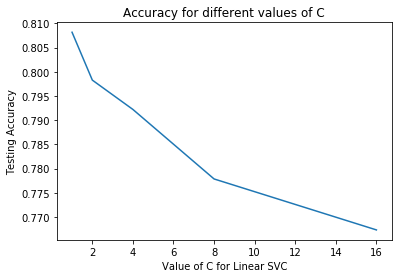

In [0]:
C=[1,2,4,8,16]
accuracy=[accuracy_c1, accuracy_c2, accuracy_c4, accuracy_c8, accuracy_c16]
plt.plot(C, accuracy)
plt.xlabel('Value of C for Linear SVC')
plt.ylabel('Testing Accuracy')
plt.title("Accuracy for different values of C")

### Testing by increasing the maximum number of iterations parameter for Linear SVC

In [0]:
clf_c1it = LinearSVC(C=1.0, max_iter=10000)
clf_c1it.fit(X_train, y_train)

In [0]:
y_pred_c1it=clf_c1it.predict(X_test)
accuracy_c1it = accuracy_score(y_test, y_pred_c1it)
print("Accuracy: ",accuracy_c1it*100)

Accuracy:  80.81710820300032


# SGD Classifier

## Testing for accuracy, F1 score and confusion matrix using SGD Classifier

In [0]:
clf_sgd = linear_model.SGDClassifier()
clf_sgd.fit(X_train, y_train)

In [0]:
#SGD
y_pred_sgd=clf.predict(X_test)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print("Accuracy: ",accuracy_sgd*100)

Accuracy:  80.81710820300032


In [0]:
f1 = f1_score(y_test, y_pred_sgd,  average='macro')
print("F1 score: ",f1)

F1 score:  0.8054549474879739


In [0]:
print(confusion_matrix(y_test, y_pred_sgd))

[[1104   87   98]
 [ 131  695   67]
 [ 152   66  733]]
